In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_excel("D:/Dataset/Economic_Index.xlsx")

In [3]:
df_index.head()

,Interest_rate,Unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.4,1293
4,2.50,5.6,1256


In [4]:
## Null value Checking
df_index.isnull().sum()

Interest_rate        0
Unemployment_rate    0
index_price          0
dtype: int64

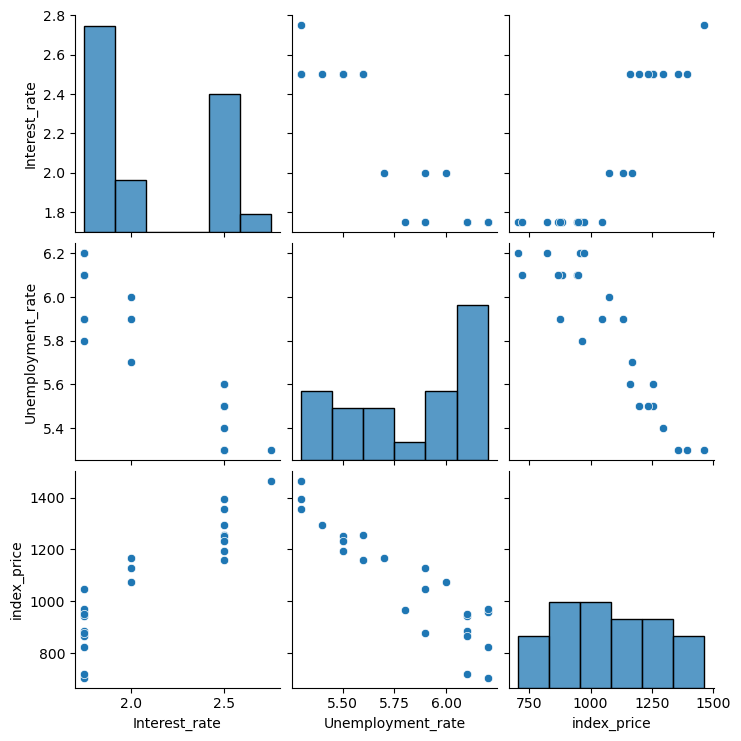

In [5]:
## Visualization
sns.pairplot(df_index)

In [6]:
df_index.corr()

,Interest_rate,Unemployment_rate,index_price
Interest_rate,1.000000,-0.925198,0.898382
Unemployment_rate,-0.925198,1.000000,-0.914556
index_price,0.898382,-0.914556,1.000000


Text(0, 0.5, 'Unemployment_rate')

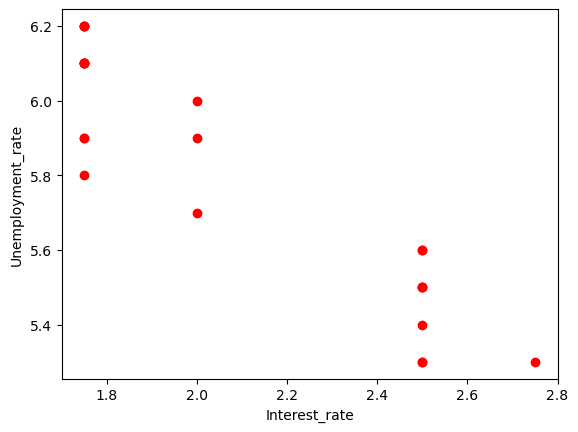

In [7]:
## Visualize datapoints more closely
plt.scatter(df_index['Interest_rate'],df_index['Unemployment_rate'],color='r')
plt.xlabel('Interest_rate')
plt.ylabel('Unemployment_rate')

In [8]:
## Independent and Dependent featute split
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [9]:
X.head()

,Interest_rate,Unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.4
4,2.50,5.6


In [10]:
X.shape

(24, 2)

In [11]:
y.shape

(24,)

In [12]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='Interest_rate', ylabel='index_price'>

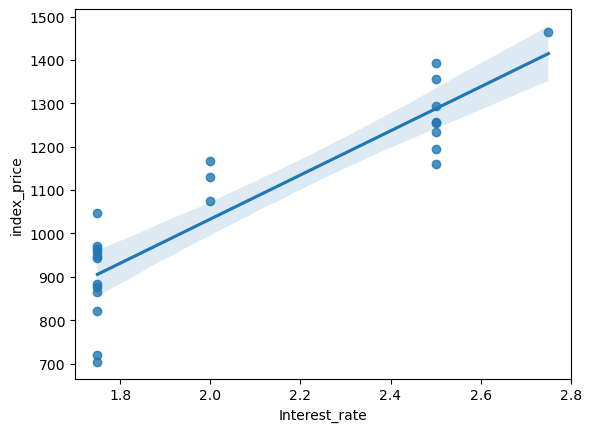

In [13]:
sns.regplot(x='Interest_rate', y='index_price', data=df_index)

<Axes: xlabel='Interest_rate', ylabel='Unemployment_rate'>

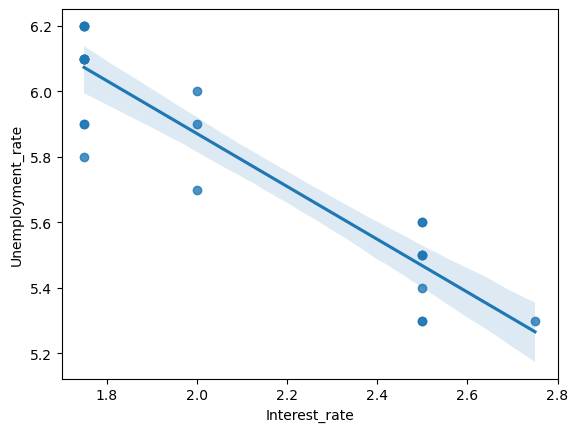

In [14]:
sns.regplot(x='Interest_rate', y='Unemployment_rate', data=df_index)

<Axes: xlabel='Interest_rate', ylabel='index_price'>

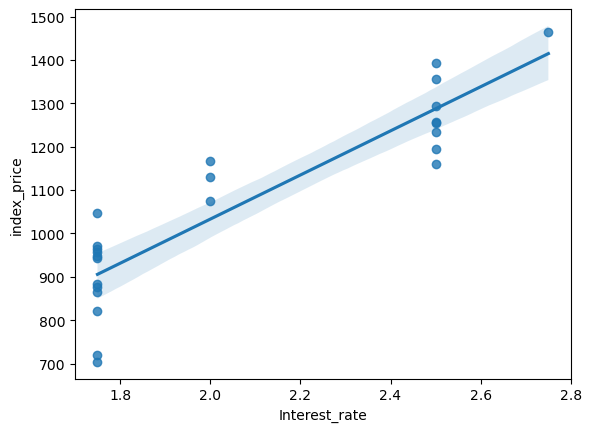

In [15]:
sns.regplot(x='Interest_rate', y='index_price', data=df_index)

<Axes: xlabel='Unemployment_rate', ylabel='index_price'>

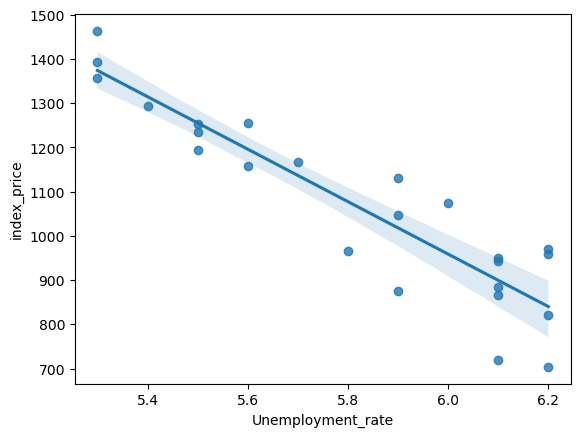

In [16]:
sns.regplot(x='Unemployment_rate', y='index_price', data=df_index)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=5)
validation_score

array([ -1225.17276313,  -8704.71631417,  -9392.46886161, -15716.90111601,
        -2241.72702295])

In [20]:
np.mean(validation_score)

-7456.197215574638

In [27]:
## Prediction
y_pred = regression.predict(X_test)
y_pred

array([1224.97405553,  835.94424215, 1395.5013655 ,  876.79494766,
        965.62084661, 1088.17296313])

In [22]:
## Preformance Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mean_squared_error ::",mse)
print("mean_absolute_error :: ",mae)
print("root_mean_squared_error ::",rmse)

mean_squared_error :: 7585.68506297331
mean_absolute_error ::  77.48994841450478
root_mean_squared_error :: 87.09583837918612


In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R-Squared Error ::",score)

R-Squared Error :: 0.7746692359058961


In [24]:
## Display adjusted R-Squared Error
print("Adjusted R-Squared Error ::",(1-(1-score)*len(y_test)-1)/len(y_test-X_test.shape[1]-1))

Adjusted R-Squared Error :: -0.2253307640941039


In [25]:
print("Coefficient or slope ::",regression.coef_)
print("Intercept :: ",regression.intercept_)

Coefficient or slope :: [  68.88623687 -130.52984031]
Intercept ::  1053.4444444444443


## Assumption

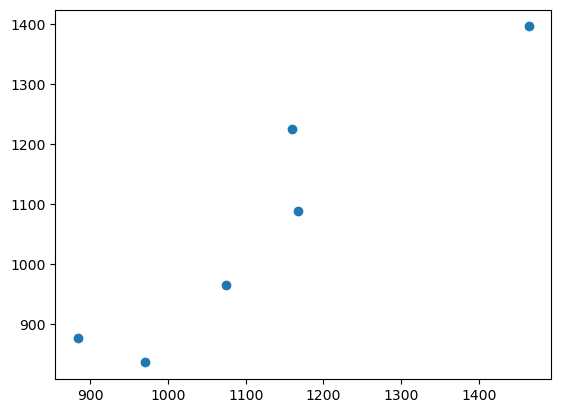

In [29]:
plt.scatter(y_test,y_pred)

In [31]:
residuals=y_test-y_pred
print(residuals)

8     -65.974056
16    135.055758
0      68.498635
18      7.205052
11    109.379153
9      78.827037
Name: index_price, dtype: float64


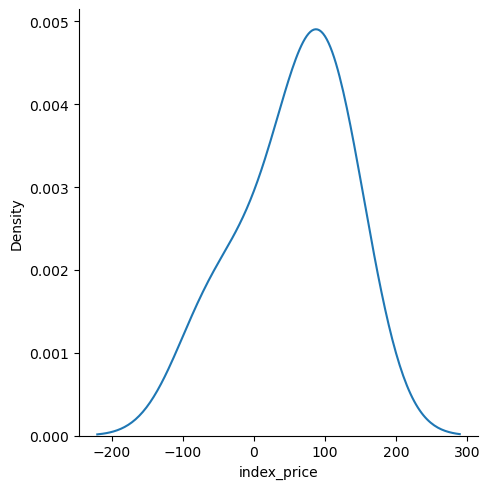

In [33]:
# plot this residuals
sns.displot(residuals,kind='kde')

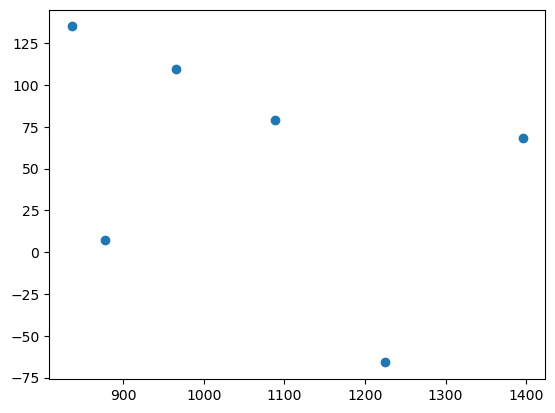

In [34]:
## Scatter plot with respect to predictions and residuals
plt.scatter(y_pred,residuals)

In [37]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.088
Method:                 Least Squares   F-statistic:                             0.2755
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                       0.763
Time:                        16:59:16   Log-Likelihood:                         -150.87
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            68.8862    697.902      0.099      0.923   -1410.601    1548.373
x2          -130.5298    697.902     -0.187      0.854   -1610.017    1348.957
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.425
Skew:                          -0.243   Prob(JB):                        0.809
Kurtosis:                       2.426   Cond. No.                         5.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""